In [30]:
# early stopping

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

In [32]:
# X,y = make_circles(n_samples=100, noise=0.03, random_state=42)
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

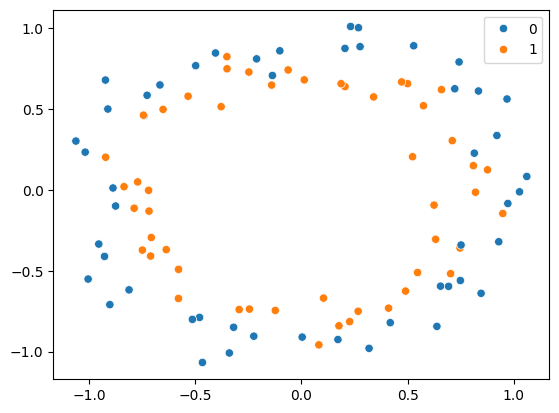

In [33]:
# sns.scatterplot(X[:,0],X[:,1],hue=y)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [59]:
model = Sequential()

model.add(Dense(256,input_dim = 2 ,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [ ]:
import time
start = time.time()
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test))
end = time.time()
print("Time taken : ",end-start)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.5344 - loss: 0.6896 - val_accuracy: 0.3000 - val_loss: 0.7029
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5289 - loss: 0.6896 - val_accuracy: 0.3500 - val_loss: 0.7067
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5703 - loss: 0.6851 - val_accuracy: 0.3000 - val_loss: 0.7129
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5813 - loss: 0.6812 - val_accuracy: 0.3500 - val_loss: 0.7176
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5266 - loss: 0.6837 - val_accuracy: 0.3000 - val_loss: 0.7208
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5094 - loss: 0.6870 - val_accuracy: 0.3000 - val_loss: 0.7246
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5562 - loss: 0.6800 - val_accuracy: 0.3000 - val_loss: 0.7281
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5586 - loss: 0.6794 - val_accuracy: 0.3000 - val_loss

Text(0.5, 0, 'epoch')

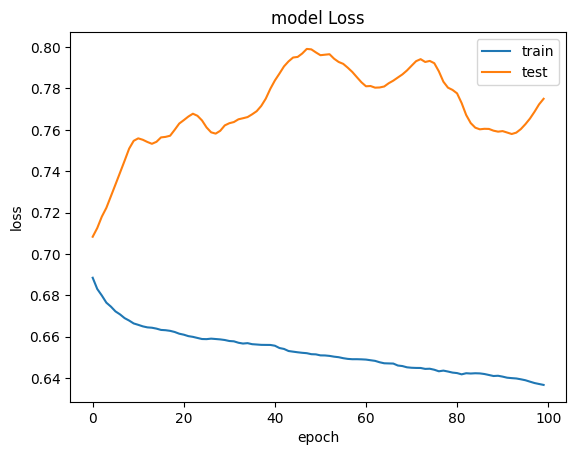

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


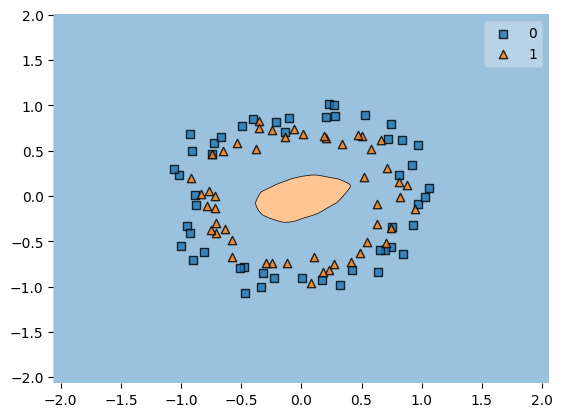

In [42]:
plot_decision_regions(X, y, clf=model)
plt.show()

## Early Stopping

In [43]:
model = Sequential()
model.add(Dense(256,input_dim = 2 ,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [53]:
callback = EarlyStopping(monitor='val_loss', patience=20,verbose=1,min_delta=0.0001,baseline=None,mode='auto',restore_best_weights=True)

In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

In [55]:
history = model.fit(X_train,y_train,epochs=3500,validation_data=(X_test,y_test),callbacks=[callback])

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5684 - loss: 0.6819 - val_accuracy: 0.3333 - val_loss: 0.7154
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5762 - loss: 0.6784 - val_accuracy: 0.3333 - val_loss: 0.7205
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5801 - loss: 0.6756 - val_accuracy: 0.3333 - val_loss: 0.7263
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6035 - loss: 0.6687 - val_accuracy: 0.3333 - val_loss: 0.7327
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5801 - loss: 0.6723 - val_accuracy: 0.3333 - val_loss: 0.7370
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5645 - loss: 0.6717 - val_accuracy: 0.3333 - val_loss: 0.7409
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5723 - loss: 0.6722 - val_accuracy: 0.3333 - val_loss: 0.7468
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5801 - loss: 0.6683 - val_accuracy: 0.3333 - v

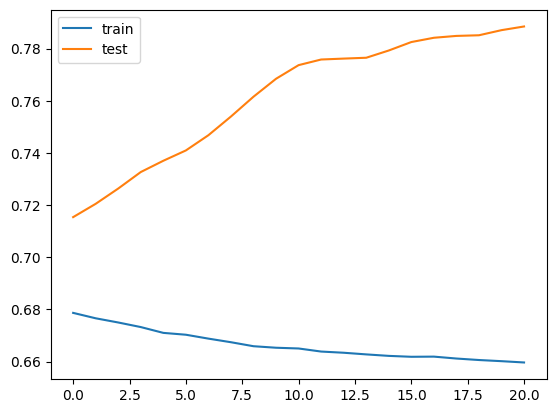

In [56]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


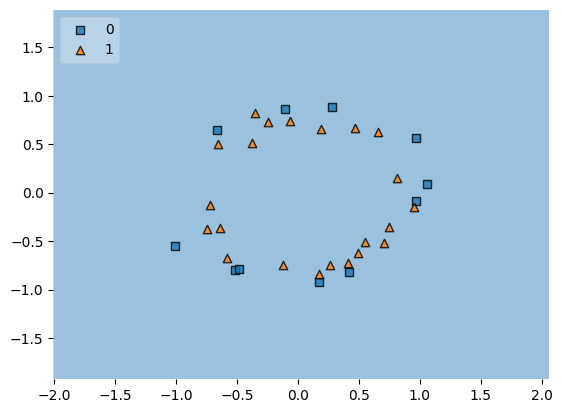

In [57]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()